<a href="https://colab.research.google.com/github/dourivaljunior/flask/blob/main/cotacao_moedas_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto:
# Consulta de cotação de moedas na API do portal awesomeapi.com.br.
# Extração de dados do portal awesomeapi.com.br.
# Geração de gáficos com o matplotlib.


In [1]:
import requests
import json
from datetime import date, time, datetime
import numpy as np
import pandas as pd

In [2]:
cotacoes_geral = requests.get("https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL")
cotacoes_geral_dic = cotacoes_geral.json()
print(cotacoes_geral_dic)

{'USDBRL': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.1444', 'low': '5.1444', 'varBid': '0.0004', 'pctChange': '0.01', 'bid': '5.144', 'ask': '5.1447', 'timestamp': '1667952151', 'create_date': '2022-11-08 21:02:31'}, 'EURBRL': {'code': 'EUR', 'codein': 'BRL', 'name': 'Euro/Real Brasileiro', 'high': '5.1881', 'low': '5.1809', 'varBid': '0.0027', 'pctChange': '0.05', 'bid': '5.1831', 'ask': '5.1843', 'timestamp': '1667952152', 'create_date': '2022-11-08 21:02:32'}, 'BTCBRL': {'code': 'BTC', 'codein': 'BRL', 'name': 'Bitcoin/Real Brasileiro', 'high': '107.132', 'low': '95.05', 'varBid': '-9815', 'pctChange': '-9.2', 'bid': '96.815', 'ask': '96.825', 'timestamp': '1667951829', 'create_date': '2022-11-08 20:57:09'}}


In [3]:
cotacao_USDBRL= cotacoes_geral_dic['USDBRL']['bid']    ##bid é o valor da cotação da moeda
cotacao_EURBRL = cotacoes_geral_dic['EURBRL']['bid']
cotacao_BTCBRL = cotacoes_geral_dic['BTCBRL']['bid']
print("as cotações são:" "USDBRL:" ,cotacao_USDBRL,"EURBRL:" ,cotacao_EURBRL,"BTCBRL:" ,cotacao_BTCBRL)

as cotações são:USDBRL: 5.144 EURBRL: 5.1831 BTCBRL: 96.815


In [4]:
cot= requests.get("https://economia.awesomeapi.com.br/json/daily/USD-BRL/365?start_date=20220101&end_date=20221022")
cot_dic = cot.json()
df_cot = pd.DataFrame(cot_dic, columns = ['high','low','varBid','bid','ask','timestamp'])
df_cot['timestamp']=pd.to_datetime(df_cot['timestamp'],unit='s')
df_cot['data']=df_cot['timestamp'].dt.date
print(df_cot.head())


     high     low   varBid     bid     ask           timestamp        data
0  5.2768  5.1414  -0.0502  5.1639  5.1651 2022-10-21 20:59:57  2022-10-21
1  5.2768  5.1414  -0.0502  5.1639  5.1651 2022-10-21 20:59:57  2022-10-21
2   5.218  5.2149   0.0033  5.2176  5.2184 2022-10-20 23:58:56  2022-10-20
3  5.2712  5.2705   0.0008  5.2703  5.2713 2022-10-19 23:59:41  2022-10-19
4  5.2414   5.241   0.0007  5.2408  5.2415 2022-10-18 23:59:36  2022-10-18


In [5]:
df_cot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   high       239 non-null    object        
 1   low        239 non-null    object        
 2   varBid     239 non-null    object        
 3   bid        239 non-null    object        
 4   ask        239 non-null    object        
 5   timestamp  239 non-null    datetime64[ns]
 6   data       239 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.2+ KB


In [6]:
df_cot['bid']=df_cot['bid'].astype('float')

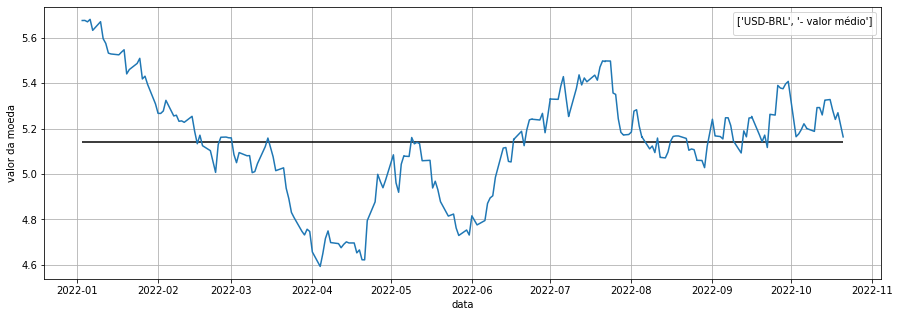

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
(x,y)=(df_cot['data'],df_cot['bid'])
plt.plot(x,y)
plt.legend(title=['USD-BRL','- valor médio'])
plt.xlabel('data')
plt.ylabel('valor da moeda')
plt.hlines(5.14,df_cot['data'].min(),df_cot['data'].max())
plt.grid()
plt.show()

In [10]:
val_med=df_cot['bid'].mean()
print(val_med)

5.144276569037656
